In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salaries.csv')
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:xlabel='job_rank', ylabel='count'>

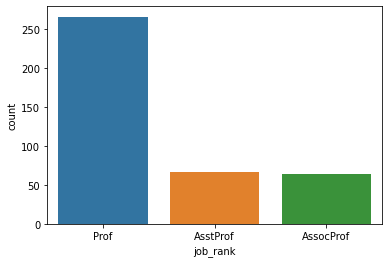

In [5]:
df.rename(columns = {'rank' : 'job_rank'}, inplace = True)
df.job_rank.unique()
sns.countplot(df['job_rank'])

<AxesSubplot:xlabel='discipline', ylabel='count'>

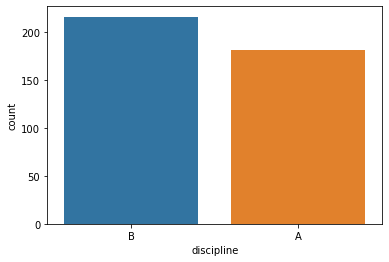

In [6]:
df.discipline.unique()
sns.countplot(df['discipline'])

<AxesSubplot:xlabel='sex', ylabel='count'>

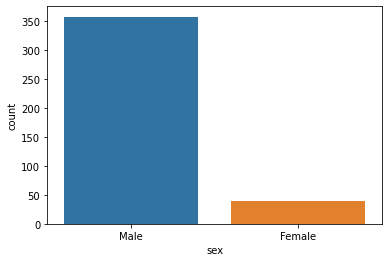

In [7]:
df.sex.unique()
sns.countplot(df['sex'])

In [8]:
df.discipline.unique()

array(['B', 'A'], dtype=object)

In [9]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


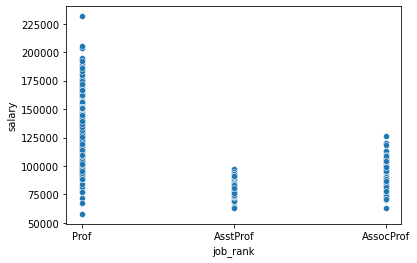

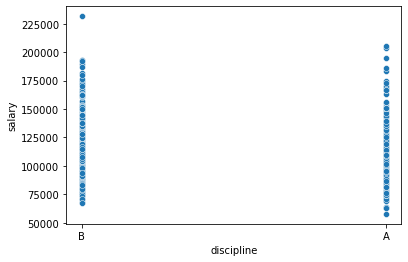

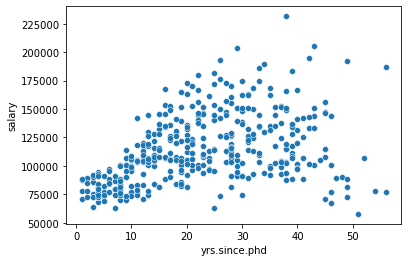

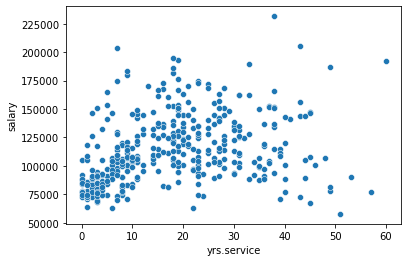

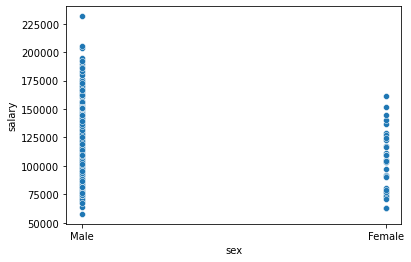

In [10]:
for i in df.columns:
    if i != 'salary':
        sns.scatterplot(x = df[i], y = df['salary'])
        plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

encode.fit(df['sex'])

df['sex'] = encode.transform(df['sex'])

<AxesSubplot:xlabel='sex', ylabel='count'>

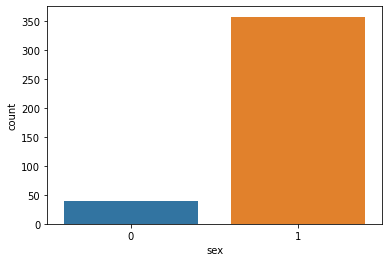

In [12]:
df['sex'].unique()
sns.countplot(df['sex'])

In [13]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

encode.fit(df['discipline'])

df['discipline'] = encode.transform(df['discipline'])

<AxesSubplot:xlabel='discipline', ylabel='count'>

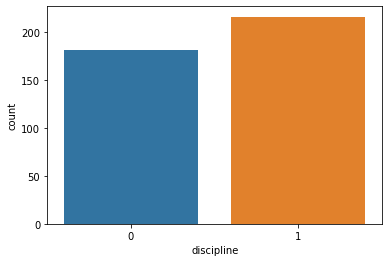

In [14]:
df['discipline'].unique()
sns.countplot(df['discipline'])

In [15]:
scale_mapper = {"AssocProf":1, "AsstProf":2, "Prof":3}
df['job_rank'] = df['job_rank'].replace(scale_mapper)

In [16]:
df['job_rank'].unique()

array([3, 2, 1], dtype=int64)

<AxesSubplot:xlabel='job_rank', ylabel='count'>

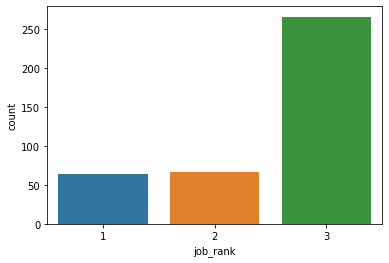

In [17]:
df['job_rank'].unique()
sns.countplot(df['job_rank'])

In [18]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
job_rank         0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

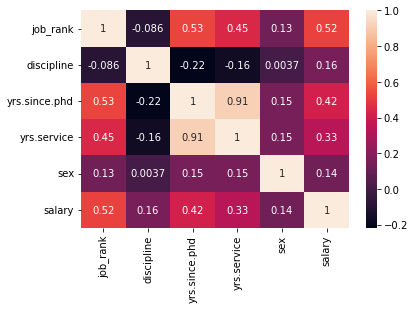

In [19]:
sns.heatmap(df.corr(), annot = True)

Discipline and sex doesn't have least correlation with salary hence droping those columns

In [20]:
del(df['sex'], df['discipline'])
df.head()
df.head()

,job_rank,yrs.since.phd,yrs.service,salary
0,3,19,18,139750
1,3,20,16,173200
2,2,4,3,79750
3,3,45,39,115000
4,3,40,41,141500


In [21]:
df.skew()

job_rank        -1.151164
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

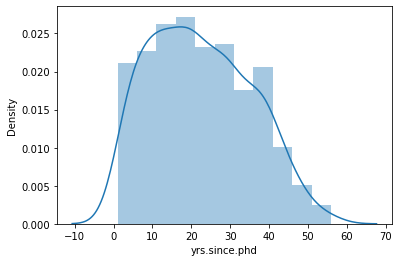

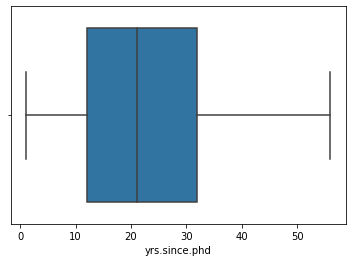

In [22]:
sns.distplot(df['yrs.since.phd'])
plt.show()
sns.boxplot(df['yrs.since.phd'])
plt.show()

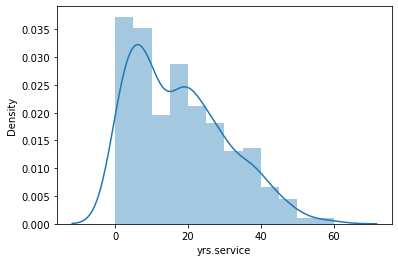

<function matplotlib.pyplot.show(close=None, block=None)>

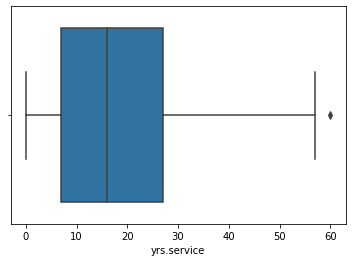

In [23]:
sns.distplot(df['yrs.service'])
plt.show()
sns.boxplot(df['yrs.service'])
plt.show

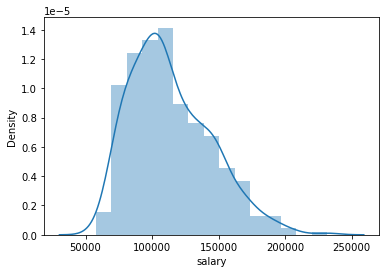

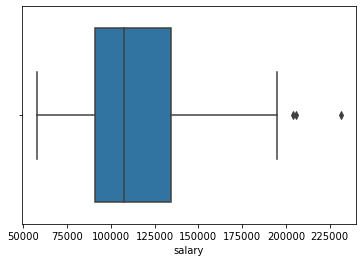

In [24]:
sns.distplot(df['salary'])
plt.show()
sns.boxplot(df['salary'])
plt.show()

In [25]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
z.shape

(397, 4)

In [26]:
threshold = 3 # rule of thumb
# index number
print(np.where(z > 3))
ind = np.where(z > 3)[0]

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [27]:
z.iloc[43]

job_rank         0.649257
yrs.since.phd    1.218664
yrs.service      1.569358
salary           3.895377
Name: 43, dtype: float64

In [28]:
df_new = df.drop(index = ind)

In [29]:
df.shape

(397, 4)

In [30]:
df_new.shape

(393, 4)

In [31]:
x = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]

In [32]:
from sklearn.preprocessing import power_transform
x = power_transform(x)

In [33]:
pd.DataFrame(x).skew()

0   -0.792499
1   -0.134628
2   -0.129060
dtype: float64

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [35]:
x

array([[ 0.69778877, -0.11344983,  0.26888583],
       [ 0.69778877, -0.03455335,  0.1209006 ],
       [-1.12166513, -1.6242611 , -1.28449532],
       ...,
       [ 0.69778877,  1.42772852,  0.72581897],
       [ 0.69778877,  0.33874878,  0.04312953],
       [-1.12166513, -1.12908354, -1.11979784]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import mean_squared_error

In [56]:
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = i, test_size = 0.2)
    pred_train = lr.fit(x_train, y_train)
    print(regress.coef_)
    pred_test = lr.predict(x_test)
    print(mean_squared_error(y_test, pred_test), '\n')

[14698.50573778  6856.77479564 -3445.107148  ]
651212924.1409429 

[14698.50573778  6856.77479564 -3445.107148  ]
493744769.05802685 

[14698.50573778  6856.77479564 -3445.107148  ]
451938140.72943723 

[14698.50573778  6856.77479564 -3445.107148  ]
469087812.32205313 

[14698.50573778  6856.77479564 -3445.107148  ]
521774982.4422049 

[14698.50573778  6856.77479564 -3445.107148  ]
467290312.27621865 

[14698.50573778  6856.77479564 -3445.107148  ]
607075650.7415422 

[14698.50573778  6856.77479564 -3445.107148  ]
408410564.7199997 

[14698.50573778  6856.77479564 -3445.107148  ]
435341659.98226994 

[14698.50573778  6856.77479564 -3445.107148  ]
702333791.0052764 

[14698.50573778  6856.77479564 -3445.107148  ]
612665132.080938 

[14698.50573778  6856.77479564 -3445.107148  ]
464795813.28075033 

[14698.50573778  6856.77479564 -3445.107148  ]
712121557.545834 

[14698.50573778  6856.77479564 -3445.107148  ]
424535967.0409916 

[14698.50573778  6856.77479564 -3445.107148  ]
686028199.6

[14698.50573778  6856.77479564 -3445.107148  ]
717005336.0934157 

[14698.50573778  6856.77479564 -3445.107148  ]
642765335.2857511 

[14698.50573778  6856.77479564 -3445.107148  ]
719486501.2421796 

[14698.50573778  6856.77479564 -3445.107148  ]
523076587.00349003 

[14698.50573778  6856.77479564 -3445.107148  ]
520784744.89221144 

[14698.50573778  6856.77479564 -3445.107148  ]
570898326.646351 

[14698.50573778  6856.77479564 -3445.107148  ]
536858483.6179372 

[14698.50573778  6856.77479564 -3445.107148  ]
417444585.8204419 

[14698.50573778  6856.77479564 -3445.107148  ]
510590167.8460837 

[14698.50573778  6856.77479564 -3445.107148  ]
714819546.0633103 

[14698.50573778  6856.77479564 -3445.107148  ]
735991657.5115695 

[14698.50573778  6856.77479564 -3445.107148  ]
476893115.5539272 

[14698.50573778  6856.77479564 -3445.107148  ]
526033065.04034513 

[14698.50573778  6856.77479564 -3445.107148  ]
597184836.1853427 

[14698.50573778  6856.77479564 -3445.107148  ]
642844820.398

[14698.50573778  6856.77479564 -3445.107148  ]
643219754.6124673 

[14698.50573778  6856.77479564 -3445.107148  ]
529137851.43762004 

[14698.50573778  6856.77479564 -3445.107148  ]
650693249.5221194 

[14698.50573778  6856.77479564 -3445.107148  ]
524667484.2461627 

[14698.50573778  6856.77479564 -3445.107148  ]
536272099.09669304 

[14698.50573778  6856.77479564 -3445.107148  ]
644695943.6530148 

[14698.50573778  6856.77479564 -3445.107148  ]
510270800.7868694 

[14698.50573778  6856.77479564 -3445.107148  ]
538197229.2944036 

[14698.50573778  6856.77479564 -3445.107148  ]
573474468.7133667 

[14698.50573778  6856.77479564 -3445.107148  ]
486957615.0315606 

[14698.50573778  6856.77479564 -3445.107148  ]
552789801.4003445 

[14698.50573778  6856.77479564 -3445.107148  ]
652409249.0188876 

[14698.50573778  6856.77479564 -3445.107148  ]
482467173.292556 

[14698.50573778  6856.77479564 -3445.107148  ]
667000675.3235986 

[14698.50573778  6856.77479564 -3445.107148  ]
516801451.8339

[14698.50573778  6856.77479564 -3445.107148  ]
551022290.0597602 

[14698.50573778  6856.77479564 -3445.107148  ]
495286746.4705334 

[14698.50573778  6856.77479564 -3445.107148  ]
416351042.7734182 

[14698.50573778  6856.77479564 -3445.107148  ]
567394498.536561 

[14698.50573778  6856.77479564 -3445.107148  ]
584647793.2499133 

[14698.50573778  6856.77479564 -3445.107148  ]
364030154.6508683 

[14698.50573778  6856.77479564 -3445.107148  ]
448408474.10447115 

[14698.50573778  6856.77479564 -3445.107148  ]
808399627.2998515 

[14698.50573778  6856.77479564 -3445.107148  ]
567425465.0600667 

[14698.50573778  6856.77479564 -3445.107148  ]
576010849.1524919 

[14698.50573778  6856.77479564 -3445.107148  ]
451287612.5739961 

[14698.50573778  6856.77479564 -3445.107148  ]
525723864.50302714 

[14698.50573778  6856.77479564 -3445.107148  ]
566226909.5146419 

[14698.50573778  6856.77479564 -3445.107148  ]
622026402.3121935 

[14698.50573778  6856.77479564 -3445.107148  ]
618913427.0071

[14698.50573778  6856.77479564 -3445.107148  ]
590289965.6173558 

[14698.50573778  6856.77479564 -3445.107148  ]
390683176.8895902 

[14698.50573778  6856.77479564 -3445.107148  ]
699039880.8633925 

[14698.50573778  6856.77479564 -3445.107148  ]
521121100.4125732 

[14698.50573778  6856.77479564 -3445.107148  ]
531215912.7689966 

[14698.50573778  6856.77479564 -3445.107148  ]
534706159.1627206 

[14698.50573778  6856.77479564 -3445.107148  ]
539801934.0761799 

[14698.50573778  6856.77479564 -3445.107148  ]
464210653.82585096 

[14698.50573778  6856.77479564 -3445.107148  ]
510751946.7110002 

[14698.50573778  6856.77479564 -3445.107148  ]
450260864.10158277 

[14698.50573778  6856.77479564 -3445.107148  ]
466009518.03387964 

[14698.50573778  6856.77479564 -3445.107148  ]
471121355.30383754 

[14698.50573778  6856.77479564 -3445.107148  ]
444244418.0116105 

[14698.50573778  6856.77479564 -3445.107148  ]
497330891.29126114 

[14698.50573778  6856.77479564 -3445.107148  ]
486159196.

[14698.50573778  6856.77479564 -3445.107148  ]
487023659.91898566 

[14698.50573778  6856.77479564 -3445.107148  ]
563038785.0918815 

[14698.50573778  6856.77479564 -3445.107148  ]
568718638.0088239 

[14698.50573778  6856.77479564 -3445.107148  ]
727302610.2669318 

[14698.50573778  6856.77479564 -3445.107148  ]
504633467.88901144 

[14698.50573778  6856.77479564 -3445.107148  ]
556680183.0426679 

[14698.50573778  6856.77479564 -3445.107148  ]
560452451.6275662 

[14698.50573778  6856.77479564 -3445.107148  ]
579356797.8330885 

[14698.50573778  6856.77479564 -3445.107148  ]
680183114.1274955 

[14698.50573778  6856.77479564 -3445.107148  ]
475471717.91655964 

[14698.50573778  6856.77479564 -3445.107148  ]
742539748.8951331 

[14698.50573778  6856.77479564 -3445.107148  ]
585236961.1731831 

[14698.50573778  6856.77479564 -3445.107148  ]
457392308.0599133 

[14698.50573778  6856.77479564 -3445.107148  ]
468725421.4661141 

[14698.50573778  6856.77479564 -3445.107148  ]
500172421.23

[14698.50573778  6856.77479564 -3445.107148  ]
469525285.75488776 

[14698.50573778  6856.77479564 -3445.107148  ]
510114052.76811004 

[14698.50573778  6856.77479564 -3445.107148  ]
516811164.9179754 

[14698.50573778  6856.77479564 -3445.107148  ]
565474728.9076198 

[14698.50573778  6856.77479564 -3445.107148  ]
566008231.1629798 

[14698.50573778  6856.77479564 -3445.107148  ]
548484928.9042174 

[14698.50573778  6856.77479564 -3445.107148  ]
640200566.8860967 

[14698.50573778  6856.77479564 -3445.107148  ]
484576478.8268221 

[14698.50573778  6856.77479564 -3445.107148  ]
521721749.79113275 

[14698.50573778  6856.77479564 -3445.107148  ]
595153192.3832089 

[14698.50573778  6856.77479564 -3445.107148  ]
542109258.4584095 

[14698.50573778  6856.77479564 -3445.107148  ]
502035704.6734741 

[14698.50573778  6856.77479564 -3445.107148  ]
482969347.4050116 

[14698.50573778  6856.77479564 -3445.107148  ]
537992323.2684041 

[14698.50573778  6856.77479564 -3445.107148  ]
489424337.36

[14698.50573778  6856.77479564 -3445.107148  ]
586495184.7702407 

[14698.50573778  6856.77479564 -3445.107148  ]
564292537.9339907 

[14698.50573778  6856.77479564 -3445.107148  ]
619784604.1026013 

[14698.50573778  6856.77479564 -3445.107148  ]
503889163.70366096 

[14698.50573778  6856.77479564 -3445.107148  ]
453108221.63008106 

[14698.50573778  6856.77479564 -3445.107148  ]
612393914.5133792 

[14698.50573778  6856.77479564 -3445.107148  ]
555526818.2066821 

[14698.50573778  6856.77479564 -3445.107148  ]
446738423.25503373 

[14698.50573778  6856.77479564 -3445.107148  ]
613807268.9451103 

[14698.50573778  6856.77479564 -3445.107148  ]
453141087.4660745 

[14698.50573778  6856.77479564 -3445.107148  ]
568503785.4740582 

[14698.50573778  6856.77479564 -3445.107148  ]
591106521.623154 

[14698.50573778  6856.77479564 -3445.107148  ]
753490599.8438028 

[14698.50573778  6856.77479564 -3445.107148  ]
541220478.8720028 

[14698.50573778  6856.77479564 -3445.107148  ]
522617651.321